# <a href="https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results">Kaggle Dataset: 120 years of olympic history</a>

##  <font color="red">This notebook is still a work in progress </font> 

<b> Goal: </b><br>
The goal I had in mind when creating this notebook was to simply explore the dataset and find some interesting stats.<br>

<b> Structure: </b>
* [Importing Data](#Importing_Data)
* [Data Preparation](#Data_Prep)
* [Data Exploration](#Data_Exploration)<br>
 * [Disciplines, Weight, Height, ...](#Weight,Height,...)
 * [Medals](#Medals)

## <a id='Importing_Data'>Importing the Data</a>

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [175]:
athletes = pd.read_csv(r"C:\Users\JC Jones\Python\Datensets & SQL-Datenbanken\120-years-of-olympic-history-athletes-and-results\athlete_events.csv")
regions = pd.read_csv(r"C:\Users\JC Jones\Python\Datensets & SQL-Datenbanken\120-years-of-olympic-history-athletes-and-results\noc_regions.csv")

In [176]:
regions.sample(3)

,NOC,region,notes
114,LAT,Latvia,NaN
32,BUL,Bulgaria,NaN
115,LBA,Libya,NaN


In [177]:
athletes.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
119802,60661,Bjrn Kircheisen,M,22.0,183.0,69.0,Germany,GER,2006 Winter,2006,Winter,Torino,Nordic Combined,Nordic Combined Men's Sprint,NaN
138679,69662,Colette Libourel (-Conan),F,19.0,160.0,59.0,France,FRA,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 100 metres Butterfly,NaN
69685,35507,Fanny Fischer,F,21.0,175.0,63.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Women's Kayak Fours, 500 metres",Gold


In [178]:
# Combining both
df = pd.merge(athletes, regions, how="left")
df.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
92520,46860,Christian Hayner,M,22.0,195.0,120.0,Switzerland,SUI,1988 Summer,1988,Summer,Seoul,Sailing,Sailing Mixed Two Person Keelboat,NaN,Switzerland,NaN
163615,82133,Maiko Morio,F,21.0,140.0,34.0,Japan,JPN,1988 Summer,1988,Summer,Seoul,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Japan,NaN
215859,108374,Katja Seizinger (-Weber),F,21.0,171.0,64.0,Germany,GER,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Women's Super G,NaN,Germany,NaN


## <a id='Data_Prep'>Data Preparation</a>

In [179]:
missing_vals = round(df.isna().sum()/len(df), 2)
missing_vals = missing_vals[missing_vals > 0]
print(f"% of missing values:\n{missing_vals}")

% of missing values:
Age       0.03
Height    0.22
Weight    0.23
Medal     0.85
notes     0.98
dtype: float64


Missing values in the column "Medal" indicate no bronze/silver/gold medal earned. <br>
3% are missing an age, 22% their height and 23% their weigth. <br>
There are only notes in 2% of the entries. Let´s explore those:

In [180]:
notes = df.loc[~df.notes.isna()]
notes.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
170409,85636,"Wing Biu ""Edward"" Ng",M,31.0,173.0,59.0,Hong Kong,HKG,1976 Summer,1976,Summer,Montreal,Fencing,"Fencing Men's epee, Team",NaN,China,Hong Kong
209804,105346,Mirko Sandi,M,18.0,198.0,100.0,Yugoslavia,YUG,1960 Summer,1960,Summer,Roma,Water Polo,Water Polo Men's Water Polo,NaN,Serbia,Yugoslavia
30828,15881,Laverne Bryan,F,23.0,171.0,50.0,Antigua and Barbuda,ANT,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,Antigua,Antigua and Barbuda
60465,30967,Vera urakovi,F,30.0,172.0,63.0,Yugoslavia,YUG,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Women's Basketball,Bronze,Serbia,Yugoslavia
41106,21185,Chow Kwong Choi,M,20.0,170.0,59.0,Hong Kong,HKG,1964 Summer,1964,Summer,Tokyo,Cycling,"Cycling Men's Individual Pursuit, 4,000 metres",NaN,China,Hong Kong


Seems like the notes column specifies the region

## <a id='Data_Exploration'>Data Exploration</a>

<b> Initial stats:</b>

In [181]:
df.loc[:,["Age", "Height", "Weight"]].describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


### <a id='Weight,Height,...'>Disciplines, Weight, Height, ...</a>

In [183]:
print(f"There are {len(df.Sport.unique())} unique Olympic sports' disciplines.")

There are 66 unique Olympic sports' disciplines.


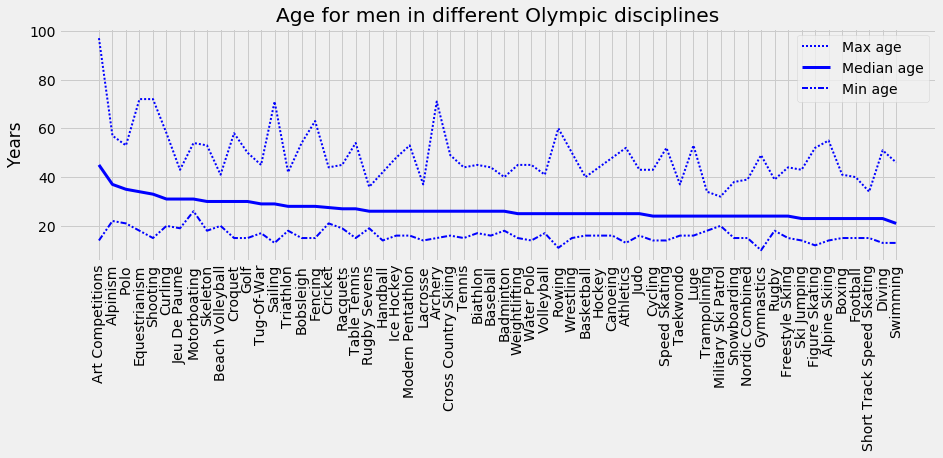

In [190]:
disciplines = df.loc[:, ["Age", "Name", "Sex", "Height", "Weight", "Sport"]]
grouped = disciplines.groupby(["Sport", "Sex"]).agg({"Age":["max", "median", "min"], "Height": ["max", "mean"], "Weight": ["max", "mean"], "Name":"count"})

# Show only disciplines with more than 10 overall participants
relevantdf = grouped[grouped["Name", "count"]>10]

#preparing the male plot
malemaxage = relevantdf.sort_values(by=("Age", "median"), ascending=False).loc[pd.IndexSlice[:, "M"],[("Age", "max")]]
maleminage = relevantdf.sort_values(by=("Age", "median"), ascending=False).loc[pd.IndexSlice[:, "M"],[("Age", "min")]]
malemedian = relevantdf.sort_values(by=("Age", "median"), ascending=False).loc[pd.IndexSlice[:, "M"],[("Age", "median")]]
 
# preparing the female plot
femalemaxage = relevantdf.sort_values(by=("Age", "median"), ascending=False).loc[pd.IndexSlice[:, "F"],[("Age", "max")]]
femaleminage = relevantdf.sort_values(by=("Age", "median"), ascending=False).loc[pd.IndexSlice[:, "F"],[("Age", "min")]]
femalemedian = relevantdf.sort_values(by=("Age", "median"), ascending=False).loc[pd.IndexSlice[:, "F"],[("Age", "median")]]

with plt.style.context("fivethirtyeight"):
    plt.subplots(figsize=(14, 4))
    
    plt.plot(malemaxage.index.droplevel(level=1), malemaxage, color="blue", linewidth=2, linestyle=(0, (1, 1)), label="Max age")
    plt.plot(malemaxage.index.droplevel(level=1), malemedian, color="blue", linewidth=3, label="Median age")
    plt.plot(malemaxage.index.droplevel(level=1), maleminage, color="blue", linewidth=2, linestyle=(0, (3, 1, 1, 1, 1, 1)), label="Min age")
    
    plt.title("Age for men in different Olympic disciplines")
    plt.ylabel("Years")
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

Since there are some disciplines in which women/men competed but not the other gender, the <b>x-axis is ordered differently in both graphs!</b>

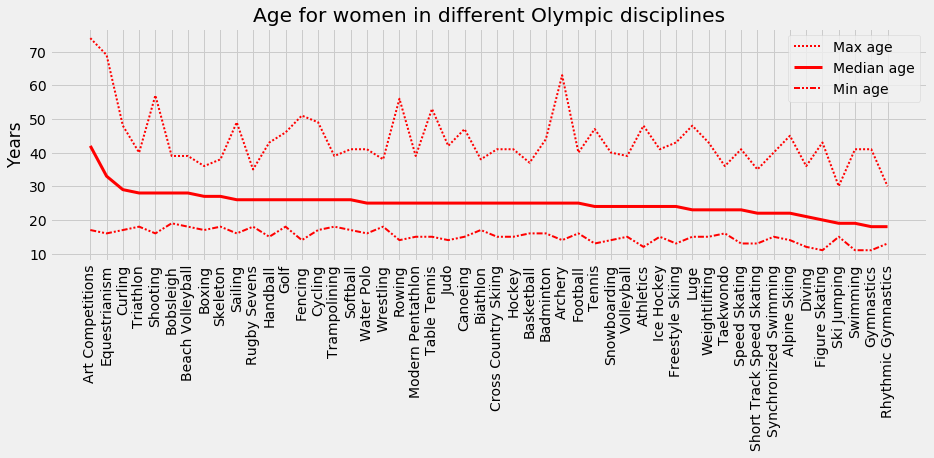

In [186]:
with plt.style.context("fivethirtyeight"):
    plt.subplots(figsize=(14, 4))
    
    plt.plot(femalemaxage.index.droplevel(level=1), femalemaxage, color="red", linewidth=2, linestyle=(0, (1, 1)), label="Max age")
    plt.plot(femalemaxage.index.droplevel(level=1), femalemedian, color="red", linewidth=3, label="Median age")
    plt.plot(femalemaxage.index.droplevel(level=1), femaleminage, color="red", linewidth=2, linestyle=(0, (3, 1, 1, 1, 1, 1)), label="Min age")
    
    plt.title("Age for women in different Olympic disciplines")
    plt.ylabel("Years")
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

### <a id='Medals'>Medals</a>

In [187]:
medals = df.loc[~df.Medal.isna(),["region", "Medal", "Team"]].groupby(["region", "Medal"]).count()
medals = medals.unstack().loc[:,"Team"]

# first 10 countries, sorted by Gold-Medals
sorted_medals = medals.sort_values(by="Gold", ascending=False).iloc[:10]
sorted_medals

Medal,Bronze,Gold,Silver
region,,,
USA,1358.0,2638.0,1641.0
Russia,1178.0,1599.0,1170.0
Germany,1260.0,1301.0,1195.0
UK,651.0,678.0,739.0
Italy,531.0,575.0,531.0
France,666.0,501.0,610.0
Sweden,535.0,479.0,522.0
Canada,451.0,463.0,438.0
Hungary,371.0,432.0,332.0


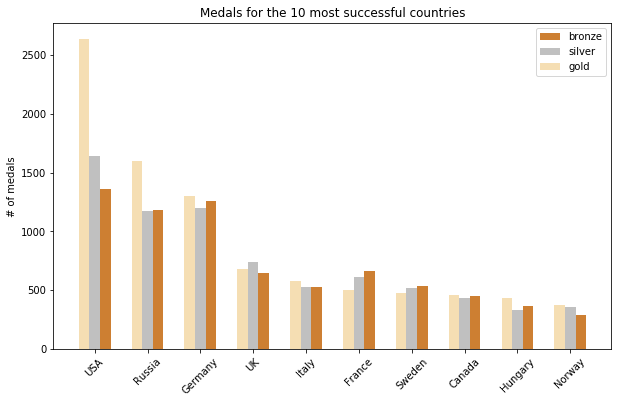

In [188]:
plt.subplots(figsize=(10,6))

plt.bar([i+0.1 for i in range(1, 11)], sorted_medals.Bronze, width=0.2, align="edge", color="#cd7f32", label="bronze")
plt.bar([i-0.1 for i in range(1, 11)], sorted_medals.Silver, width=0.2, align="edge", color="silver", label="silver")
plt.bar([i-0.3 for i in range(1, 11)], sorted_medals.Gold, width=0.2, align="edge", color="wheat", label="gold")

plt.xticks(ticks=[i for i in range(1, 11)], labels=sorted_medals.index, rotation=45)
plt.ylabel("# of medals")
plt.title("Medals for the 10 most successful countries")
plt.legend()
plt.show()

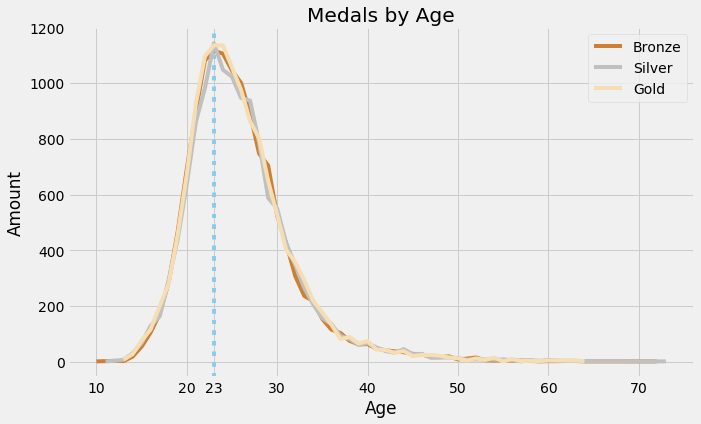

In [189]:
medals = df.loc[~df.Medal.isna(),["Medal", "Age", "Name"]]
medalsage = medals.groupby(["Age", "Medal"]).count()

# Extracting amount of medals by Material and Age
bronze = medalsage.loc[(slice(None),"Bronze"),:]
bronzemax = bronze.sort_values(by="Name", ascending=False).iloc[0].name[0]
silver = medalsage.loc[(slice(None),"Silver"),:]
silvermax = silver.sort_values(by="Name", ascending=False).iloc[0].name[0]
gold = medalsage.loc[(slice(None),"Gold"),:]
goldmax = gold.sort_values(by="Name", ascending=False).iloc[0].name[0]

with plt.style.context('fivethirtyeight'):    
    plt.subplots(figsize=(10,6))
    plt.plot(bronze.index.get_level_values(0), bronze, color="#cd7f32", label="Bronze")
    [plt.axvline(i, color="skyblue", linestyle=":") for i in [bronzemax, silvermax, goldmax]]
    plt.plot(silver.index.get_level_values(0), silver, color="silver", label="Silver")
    plt.plot(gold.index.get_level_values(0), gold, color="wheat", label="Gold")
    
    plt.title("Medals by Age")
    plt.xlabel("Age")
    plt.xticks([10,20,bronzemax, 30,40,50,60,70])
    plt.ylabel("Amount")
    plt.legend()
    plt.show()